In [2]:
import pandas as pd

In [3]:
# pip install xlrd

In [4]:
# pip install openpyxl

In [5]:
auvo = pd.read_excel('auvo.xlsx',sheet_name='Sheet1')
auvo.head()

,Data,Tarefa,Cliente,Colaborador,Tipo de monitoramento,Horario,Tempo corrido,Tempo total de trabalho na Tarefa
0,2024-01-03,35896004,Joao André Daibert de Navarro,Equipe 3,Check-in,15:12:59,-,-
1,2024-01-08,35896004,Joao André Daibert de Navarro,Equipe 3,Pausa - início,09:19:50,-,-
2,2024-01-08,37148275,Haras Alexandre Gribel,Equipe 1,Check-in,11:15:10,-,-
3,2024-01-08,37671467,Pedro Delgado de Paula,Equipe 2,Deslocamento,15:36:54,00:00:05,-
4,2024-01-08,37671467,Pedro Delgado de Paula,Equipe 2,Check-in,15:36:59,-,-


In [6]:
pbi = pd.read_excel('pbi.xlsx',sheet_name='Worksheet')
pbi.head()

,Ano Mês,taskID,Horas
0,2024-01-01 00:00:00,33991083,"6,15"
1,2024-01-01 00:00:00,34596826,"0,10"
2,2024-01-01 00:00:00,35896004,"0,00"
3,2024-01-01 00:00:00,35962617,"1,40"
4,2024-01-01 00:00:00,36708437,"1,51"


In [7]:
# Removendo hífens
auvo['Tempo total de trabalho na Tarefa'] = auvo['Tempo total de trabalho na Tarefa'].str.replace("-", "00:00:00")
tarefas = auvo['Tempo total de trabalho na Tarefa']
tarefas

0              00:00:00
1              00:00:00
2              00:00:00
3              00:00:00
4              00:00:00
             ...       
195            00:00:00
196            00:00:00
197            00:00:00
198            00:00:00
199    1 dia e 01:51:04
Name: Tempo total de trabalho na Tarefa, Length: 200, dtype: object

In [8]:
# Converte horas para decimal na base do Auvo
auvo['horas'] = tarefas.str[:5].replace(":", ".")
auvo['horas']

0      00:00
1      00:00
2      00:00
3      00:00
4      00:00
       ...  
195    00:00
196    00:00
197    00:00
198    00:00
199    1 dia
Name: horas, Length: 200, dtype: object

In [23]:
auvo['horas'] = auvo['horas'].str.replace(":", ".")

In [25]:
pbi.Horas = pbi.Horas.str.replace(",", ".")
pbi.Horas

0     6.15
1     0.10
2     0.00
3     1.40
4     1.51
      ... 
66    0.90
67    0.11
68    0.70
69    0.00
70    0.17
Name: Horas, Length: 71, dtype: object

In [65]:
auvo.loc[auvo['horas'].str.contains('dia', na=False)]
# Substituindo dias por horas
auvo.loc[auvo['Tarefa'] == '37690914'] = auvo['horas'] = 24.43
auvo.loc[auvo['Tarefa'] == '37671467'] = auvo['horas'] = 95.41
auvo.loc[auvo['Tarefa'] == '38664437'] = auvo['horas'] = 25.51

In [67]:
# Convertendo para float
auvo['horas'] = auvo['horas'].astype(float)
pbi.Horas = pbi.Horas.astype(float)

In [79]:
import numpy as np

In [127]:
auv = auvo.groupby('Tarefa')['horas'].sum()

In [147]:
# Comparando os dois
auv = pd.DataFrame(auv)
print("Auvo: ", np.sum(auv['horas']), "\nPBI: ", np.sum(pbi.Horas))

Auvo:  5101.999999999999 
PBI:  229.33999999999997


In [161]:
from matplotlib import pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x26fea5dcfb0>,
 'caps': [<matplotlib.lines.Line2D at 0x26fea6c7080>,
 'boxes': [<matplotlib.lines.Line2D at 0x26fe7e4e960>],
 'medians': [<matplotlib.lines.Line2D at 0x26fea6c76e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26fea6c79e0>],
 'means': []}

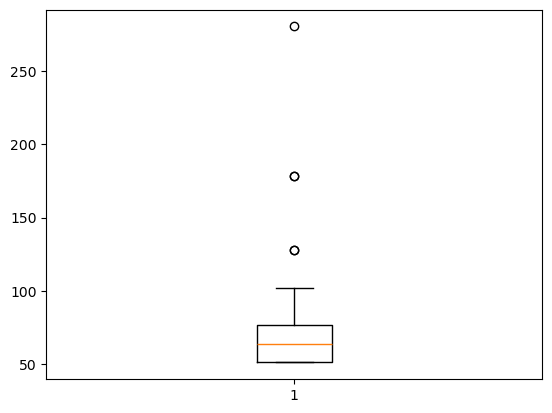

In [164]:
plt.boxplot(auv.horas)

{'whiskers': [<matplotlib.lines.Line2D at 0x26fea758290>,
 'caps': [<matplotlib.lines.Line2D at 0x26fea758860>,
 'boxes': [<matplotlib.lines.Line2D at 0x26fea71ffb0>],
 'medians': [<matplotlib.lines.Line2D at 0x26fea758cb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x26fea758f80>],
 'means': []}

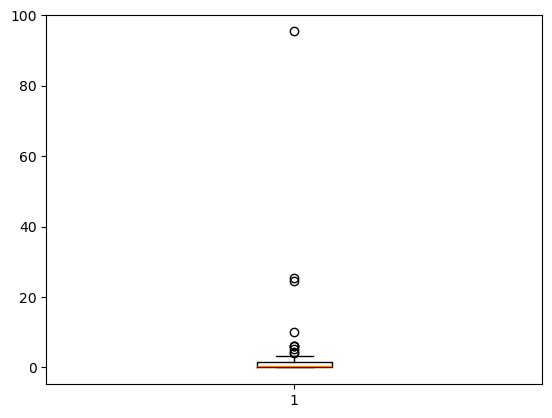

In [166]:
plt.boxplot(pbi.Horas)

In [180]:
auv.columns

Index(['horas'], dtype='object')